In [ ]:
import cv2
import numpy as np
import os




largest_percentages = []
largest_percentages = []
segmentation_files = []
segmentation_dir = 'segmentations'

for root, dirs, files in os.walk(segmentation_dir):
    for file in files:
        segmentation_files.append(os.path.join(root, file))
all_files_length = len(segmentation_files)

print(all_files_length)

4640


In [8]:
def get_percentiles(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    _, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary, connectivity=8)

    percentages = []
    for label_idx in range(1, num_labels):  # skip label 0 (background)
        area = stats[label_idx, cv2.CC_STAT_AREA]
        # Calculate the area as a percentage of the total image area
        percentage_area = round((area / (img.shape[0] * img.shape[1])) * 100, 2)
        percentages.append(percentage_area)
    return percentages


for idx, file_path in enumerate(segmentation_files):

    step = max(1, int(all_files_length * 0.05))
    if (idx + 1) % step == 0:
        progress = round(((idx + 1) / all_files_length) * 100, 2)
        print(f"{progress}% processed")
    if file_path.endswith(".png") or file_path.endswith(".jpg"):  # Check for image files

        percentages = get_percentiles(file_path)
        max_percentage = max(percentages) if percentages else 0
        if max_percentage > 0:
            largest_percentages.append(max_percentage)
        largest_percentages.extend(percentages)


5.0% processed
10.0% processed
15.0% processed
20.0% processed
25.0% processed
30.0% processed
35.0% processed
40.0% processed
45.0% processed
50.0% processed
55.0% processed
60.0% processed
65.0% processed
70.0% processed
75.0% processed
80.0% processed
85.0% processed
90.0% processed
95.0% processed
100.0% processed


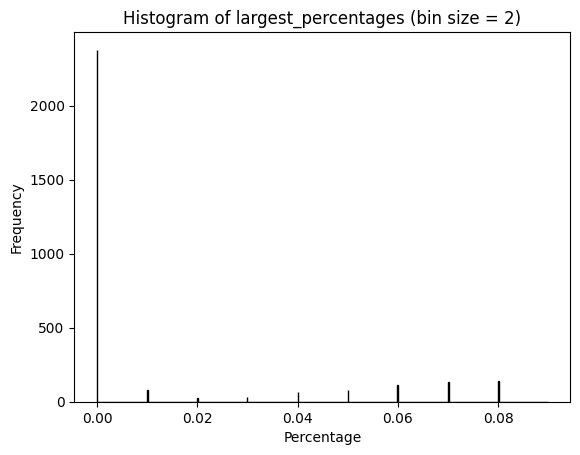

In [17]:
import matplotlib.pyplot as plt

# Create bins with size 2 using numpy's arange
bins = np.arange(min(largest_percentages), 0.09, 0.0001)

plt.hist(largest_percentages, bins=bins, edgecolor='black')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of largest_percentages (bin size = 2)')
plt.show()